# Criando um classificador para digitos escritos a mão


**Baixando e explorando o dataset**

O MNIST dataset contém 70 mil imagens de digitos escritos a mão, que vão de 0 a 9.

API do Keras facilita bastante para adquirir este dataset, abaixo iremos baixar utilizando o método `load_data` e armazenar em variáveis separadas para treino e teste, tanto das labels (ou seja, as classes corretas dos números) e as imagens dos números.


In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Explorando um pouco os dados iniciais:

In [ ]:
print(f"O tipo do dataset é {type(train_images)}")
print(f"Um exemplo de imagem armazenada e sua classe é: \n"
    f"label: {train_labels[0]} \nimagem: {train_images[0]}")

O tipo do dataset é <class 'numpy.ndarray'>
Um exemplo de imagem armazenada e sua classe é: 
label: 5 
imagem: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 

A imagem não parece muito uma imagem olhando assim com um print simples, pois é armazenada como Tensor, um conceito bastante importante que é tratado como um tipo básico de dado para armazenar textos, imagens e etc.

Podemos visalizar a imagem com ajuda do matplotlib.

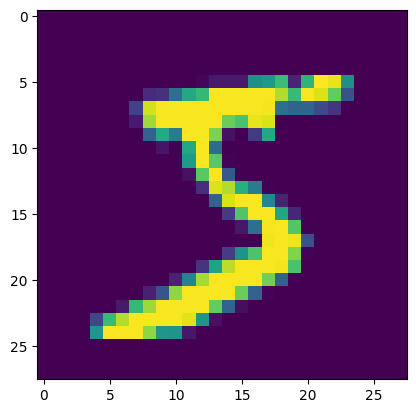

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

Agora é necessário preparar os dados para utilizar no aprendizado da rede neural:

* Reshape dos dados;
* Normalizar os dados;
* Converter os labels utilizando one-hot vector;

**Reshape dos dados**

O dataset original possui o shape `train images (60000, 28, 28) e test images (10000, 28, 28)` e ao fim do reshape fica `train_images (60000, 784) test_images (10000, 784)`

O shape do dataset pode ser representado como shape`(number_samples, height, width)`, isso quer dizer que nas imagens de teste por exemplo, possuimos 10 mil samples sendo que cada sample é representado de forma bidimensional.  

Note que 28 * 28 = 784, isso quer dizer que estamos diminuindo a dimensionalidade do dado, passando de 28x28 para 768.

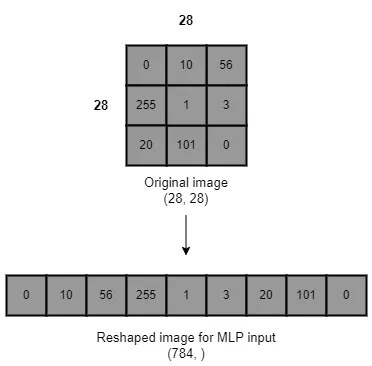



In [ ]:
import numpy as np

print(f"O shape antigo é: {train_images.shape} {test_images.shape}")
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(f"O shape novo é: {train_images.shape} {test_images.shape}")

O shape antigo é: (60000, 28, 28) (10000, 28, 28)
O shape novo é: (60000, 784) (10000, 784)


**Normalizar os dados**

Os dados serão normalizados para facilitar a aprendizadem de máquina. Os valores dos pixels da imagem variam de 0 a 255, então a divisão para 255 irá tornar todos os valores 0 ou 1.

Antes de realizar a divisão, a conversão para float32 garante que obteremos valores decimais.

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

**Converter os labels utilizando one-hot vector**

As labels atualmente vão de 0 a 9, e não são muito adequadas para output do nosso modelo.

One-hot vector é uma técnica para tornar esta label categórica em um array n-dimensional que representa a label, e é mais apropriada para o aprendizado de máquina.

Ex: a label `3` seria `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`.

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Criando a arquitetura da rede neural**

A arquitetura da rede neural é criada explicitamente abaixo, adicionando:

* Input Layer (784 nós)
* Hidden Layer 1 (256 nós)
* Hidden Layer 2 (256 nós)
* Output layer (10 nós)

Esta rede neural possui duas camadas escondidas, ao total 4 camadas (input, output e 2 hidden layers).

O input tem o formato de 784 e a saída 10.

As camadas escondidas tem ativação **ReLu**, a camada de output tem ativação **Softmax**, a camada de input não possui ativação.

In [ ]:
# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

MLP = Sequential()
MLP.add(InputLayer(input_shape=(784, ))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(10, activation='softmax')) # output layer

# summary
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


A rede possui ao total **269,322 parâmetros**, que serão definidos da melhor forma durante o treinamento, estes parâmetros são os pesos e bias para a rede.

**As funções de ativação**

Funções de ativação são um elemento dos nós que decidem se eles devem ser ativados ou não.

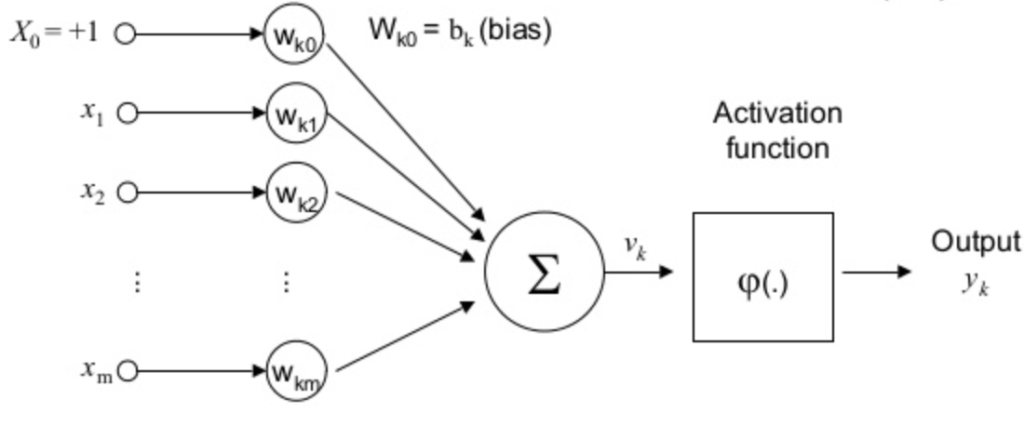


A função ReLu é uma função de ativação não-linear, ela funciona bem para este problema pois a tarefa de classificar digitos escritos a mão não é uma tarefa linear.

A função da camada de output é a Softmax, a única opção para problemas de classificação de multiclasse.

**Otimização**

Nessa parte, a função de custo, otimizador e métricas de avaliação para utilizar durante o treinamento.

Configuramos caterogiral_crossentropy, Adam como otimizador e a métrica acurácia.

In [ ]:
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

**Treinamento**

Fornecemos os dados de treinamento e suas labels para o método `fit`, juntamente com o batch_size e a quantia de épocas.

As épocas significam a quantia de vezes que o dataset será visto pelo modelo, neste caso 20 vezes.

O bath_size é a quantia de instâncias de dados que estará presente no lote que separamos para passar para o modelo por vez.

O treinamento será executado em 469 partes, onde as 128 instâncias dentro do batch separado serão para nosso modelo, e ao final, os pesos da nossa rede será ajustada para encontrar o valor ótimo de maneira a melhorar a classificação. Esse passo é repetido até completar as 469 iterações.

O que foi descrito acima será executado para todas as 20 épocas.

In [ ]:
MLP.fit(train_images, train_labels,
        epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 10s 17ms/step - loss: 0.2579 - accuracy: 0.9246
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0954 - accuracy: 0.9716
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0626 - accuracy: 0.9812
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0267 - accuracy: 0.9909
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0146 - accuracy: 0.9949
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy:

**Avaliando o modelo**

Para avaliar o modelo chamamos método `evaluate` passando os dados de teste e suas labels.

> Abaixo imprimimos a loss e a acurácia, batendo uma acurácia de mais de 95%



In [ ]:
test_loss, test_acc = MLP.evaluate(test_images, test_labels,
                                   batch_size=128)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {(test_acc * 100):.2f}%")

79/79 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9797
Test loss: 0.0974184051156044
Test accuracy: 97.97%


**Predizendo novos dados**

Agora vamos classificar um dígito não visto utilizando o modelo

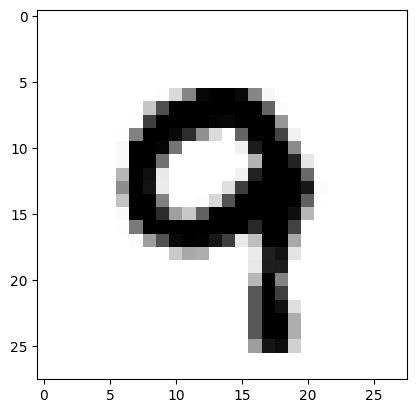

In [ ]:
import matplotlib.pyplot as plt

(_, _), (unseen_images, _) = mnist.load_data()
digit = unseen_images[99]
plt.imshow(digit, cmap="binary")

digit = np.reshape(digit, (-1, 784))
digit = digit.astype('float32') / 255

O digito a ser classificado é um número 4, utilizando o método `predict` vamos verificar se o modelo identificará corretamente digito.

In [ ]:
MLP.predict(digit, verbose=0)

array([[4.1428276e-16, 2.7970980e-17, 1.2511325e-14, 3.0970303e-11,
        2.8221812e-11, 2.6113852e-15, 4.2039777e-23, 8.3762455e-09,
        2.1627910e-13, 1.0000000e+00]], dtype=float32)

Devido a função de ativação Softmax, o output é um array que contem probabilidades de cada classe, a maior probabilidade é a que o nosso modelo pensa que o dado se encaixa.

Notamos que a quinta posição do nosso vetor possui a maior probabilidade, que é justamente o 4 (lembre-se que as posições vão de 0 a 9).  

Podemos pegar a maior probabilidade da saída utilizando `np.argmax()`

In [ ]:
np.argmax(MLP.predict(digit))

1/1 [==============================] - 0s 21ms/step


9

# Otimizando os parâmetros com Grid Search

Primeiro é necessário criar uma classe que seja compativel com o sklearn para utilizarmos a lib para realizar o grid search

In [ ]:
from sklearn.base import BaseEstimator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

class MSClassifier(BaseEstimator):


    def __init__(self, epochs=20, batch_size=128):
        self.model = None
        self.epochs = epochs
        self.batch_size = batch_size

        self.model = Sequential()
        self.model.add(InputLayer(784))
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(10, activation='softmax'))

        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

    def fit(self, X, y):
        self.model.fit(
            X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y)
        return accuracy


Em seguida tratamos os dados

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

print(f"images shapes {images.shape} labels shape {labels.shape}")

images shapes (70000, 784) labels shape (70000,)


E executamos o grid search com alguns parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "epochs": [x for x in range(20, 24)],
    "batch_size": [128, 256]
}

grid = GridSearchCV(MSClassifier(), params, cv=5, scoring='accuracy')

In [ ]:
grid.fit(images, labels)

438/438 [==============================] - 2s 3ms/step


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'batch_size': [128, 256], 'epochs': [20, 21, 22, 23]},
             scoring='accuracy')

In [ ]:
import pandas  as pd

grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,80.516670,5.238289,1.371988,0.082671,128,20,"{'batch_size': 128, 'epochs': 20}",0.980929,0.980143,0.978143,0.976929,0.978000,0.978829,0.001477,3
1,78.343343,3.847609,1.335687,0.056581,128,21,"{'batch_size': 128, 'epochs': 21}",0.979143,0.976071,0.976357,0.978214,0.982714,0.978500,0.002398,5
2,80.711830,1.347245,1.648384,0.537591,128,22,"{'batch_size': 128, 'epochs': 22}",0.978929,0.980429,0.978143,0.976286,0.981786,0.979114,0.001889,1
3,83.009655,0.184486,1.730976,0.535752,128,23,"{'batch_size': 128, 'epochs': 23}",0.981786,0.976500,0.978714,0.978143,0.980357,0.979100,0.001823,2
4,76.764534,12.214927,1.627143,0.556821,256,20,"{'batch_size': 256, 'epochs': 20}",0.975143,0.979929,0.972929,0.974214,0.978500,0.976143,0.002643,8


Durante os testes, o melhor classificador foi `	{'batch_size': 128, 'epochs': 2}` com 97.91% de acurária e desvio de 0.001

In [ ]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
2,"{'batch_size': 128, 'epochs': 22}",0.979114,0.001889,1


# Conclusão, Dúvidas e Sugestões

**Conclusão**

Essa atividade prática foi uma das mais interessantes que fizemos na minha opinião, houve uma boa introdução na prática de redes neurais, onde passamos desde o inicio do download e pré-processamento do dataset fazendo normalização e reshape, até a construção explicita e detalhada da rede neural, passando por seus layers escondidos, de entrada e saída, funções de ativação e o que são elas, parâmetros de aprendizado como épocas e batch_size, e adaptamos o código para realizar grid search, o que foi bom para botarmos a mão na massa de fato.



**Dúvidas**

1 - No artigo que reproduzimos, na parte de **Count the number of parameters**, a cada camada o número de nós é multiplicado porém há um número sendo adicionado, por exemplo quando o autor fala:

`From input layer to the first hidden layer: 784 x 256 + 256 = 200,960`

Por qual motivo é este somatório?

Entendo que 784 é o tanto de nós da primeira camada, e 256 o tanto de nós da segunda. Cada nó da primeira camada é conectado até a segunda, isso justifica o 784*256, e isso são os pesos, ou weights, correto?

A somatória do + 256 seriam as biases?

# Referências

https://towardsdatascience.com/creating-a-multilayer-perceptron-mlp-classifier-model-to-identify-handwritten-digits-9bac1b16fe10

https://www.deeplearningbook.com.br/funcao-de-ativacao/

MNIST dataset info

    Citation: Deng, L., 2012. The mnist database of handwritten digit images for machine learning research. IEEE Signal Processing Magazine, 29(6), pp. 141–142.
    Source: http://yann.lecun.com/exdb/mnist/
    License: Yann LeCun (Courant Institute, NYU) and Corinna Cortes (Google Labs, New York) hold the copyright of the MNIST dataset which is available under the Creative Commons Attribution-ShareAlike 4.0 International License (CC BY-SA). You can learn more about different dataset license types here.